In [1]:
pip install -U scikit-learn wordcloud nltk



  Using cached nltk-3.8.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB

In [10]:
import re
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize

def read_logs():
    log_entries = []
    directory = os.getcwd()  # Get the current working directory
    file_paths = glob.glob(os.path.join(directory, "*.jrn"))
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            log_entries.extend(lines)
    return log_entries

# Function to preprocess log entries
def preprocess_logs(log_entries):
    processed_logs = []
    for entry in log_entries:
        # Simplify whitespace and strip newlines
        entry = entry.strip().replace("\n", "")
        # Remove leading timestamps and operation codes
        entry = re.sub(r"^\s*\d{2}:\d{2}:\d{2}\s+\d+\s+", "", entry)
        # Remove special formatting characters and digits clustered as error codes or IDs
        entry = re.sub(r"\d{2,}", "", entry)  # removes long sequences of digits
        entry = re.sub(r"[<>{}()\[\]]", "", entry)  # removes special characters
        # Tokenize the entry into words
        words = word_tokenize(entry)
        # Filter out non-readable words (e.g., punctuation, numbers)
        readable_words = [word for word in words if word.isalpha() and len(word) > 4]
        # Reconstruct the entry from readable words
        processed_entry = " ".join(readable_words)
        processed_logs.append(processed_entry)
    return processed_logs
nltk.download('punkt')
log_entries= read_logs()

print(len(log_entries))
# Preprocess the log entries
processed_entries = preprocess_logs(log_entries)

# Instantiate the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(4, 4))

# Fit and transform the preprocessed log entries
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_entries)

# Display the TF-IDF matrix
#print(tfidf_matrix.toarray())

# Display the feature names corresponding to the columns in the TF-IDF matrix
print(tfidf_vectorizer.get_feature_names_out())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1156474


In [ ]:
#tfidf_matrix
tfidf_vectorizer.get_feature_names_out()

array(['accept deposits unable transaction',
       'accept multiples cancel management', 'accept press cancel cancel',
       'access failed during transaction',
       'account correct number please', 'account deposit press checking',
       'account include addition charged',
       'account inquiry press checking',
       'account statement press checking', 'account transfer funds press',
       'account vegas account account', 'account vegas debit account',
       'account withdraw funds press', 'addition charged continue print',
       'addition charged continue select',
       'addition charged financial institution',
       'addition requested addition charged',
       'adjust volume terminal press',
       'adjustment cancel denomination cancel',
       'again start transaction thank',
       'agencia institucion financiera obtener',
       'agent money retract counter', 'agent money state empty',
       'agent paper state empty', 'agent paper state unknown',
       'agent pow

In [ ]:
# Compute mean TF-IDF score for each term
mean_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
terms = tfidf_vectorizer.get_feature_names_out()

# Sort terms based on their TF-IDF scores in ascending order
sorted_terms_by_tfidf = sorted(zip(terms, mean_tfidf_scores), key=lambda x: x[1])

# Calculate percentile values
total_terms = len(sorted_terms_by_tfidf)
percentile_10 = int(total_terms * 0.80)
percentile_20 = int(total_terms *  1)

# Get terms within the 80th to 100th percentile range
terms_in_percentile_range = sorted_terms_by_tfidf[percentile_10:percentile_20]

# Print the terms within the specified percentile range
print("Terms within the 80th to 100th percentile range of TF-IDF scores:")
for term, score in terms_in_percentile_range:
    if 'close' in term.lower():
        print(f"{term}: {score}")
    if 'error' in term.lower():
         print(f"{term}: {score}")
    

Terms within the 70th to 90th percentile range of TF-IDF scores:
returning state closed: 7.105300546581773e-05
customer service closed: 7.86874586026146e-05
errornr class insert: 8.446718504055012e-05
error error management: 8.87058619377926e-05
close request protocol: 0.00011005787602331549
closed close request: 0.00011005787602331549
state closed close: 0.00011005787602331549
application state closed: 0.00017297193797742905
error state mandatory: 0.00017962754222263172
application closecustomerservice command: 0.0001852643074548347
closecustomerservice command protocol: 0.0001852643074548347
error application customer: 0.00022195030893103947
error remote status: 0.00034176309351893356
error application service: 0.00036922576728919165
cccdmfw returned error: 0.0005901147971110289
application returned error: 0.0010944657107067762
returned error request: 0.0010944657107067762
error function device: 0.0011420079522187594
error device state: 0.0024797538170480042
errornr class ddcstatus: 

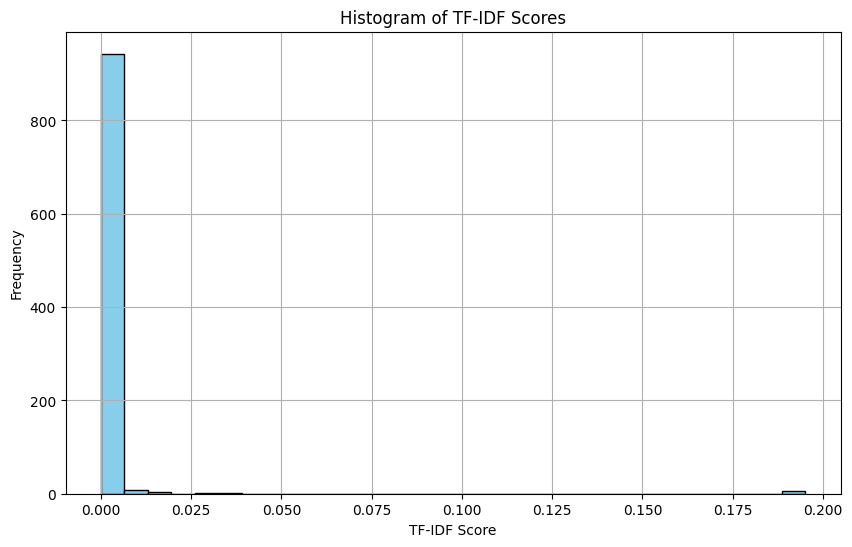

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already computed mean_tfidf_scores and terms
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_tfidf_scores, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of TF-IDF Scores')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


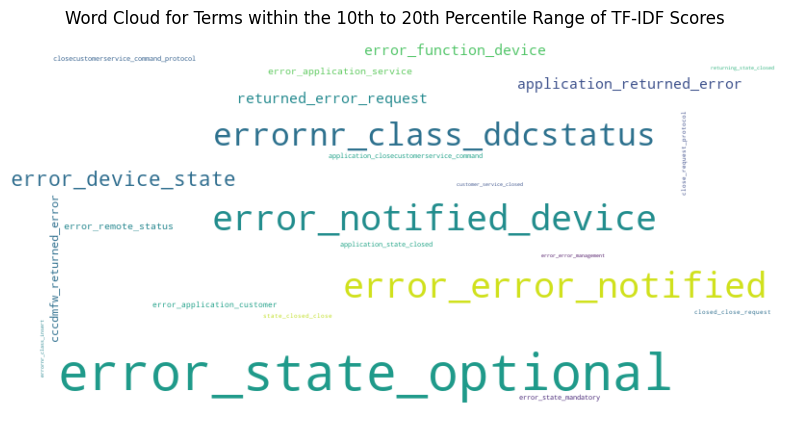

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate terms using underscores
cleaned_terms = [(term[0].replace(' ', '_'), term[1]) for term in terms_in_percentile_range if 'error' in term[0] or 'close' in term[0]]





# Create a dictionary of terms and their TF-IDF scores
terms_scores_dict = {term: score for term, score in cleaned_terms}

# Generate word cloud using TF-IDF scores as frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(terms_scores_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Terms within the 10th to 20th Percentile Range of TF-IDF Scores')
plt.show()


In [95]:
cleaned_terms

[('error error management start', 4.972009746868505e-05),
 ('error management start automatic', 4.972009746868505e-05),
 ('error error management successfully', 5.992046907780176e-05),
 ('error management successfully started', 5.992046907780176e-05),
 ('application error management ready', 8.474034003358495e-05),
 ('error detailed failure information', 8.474034003358495e-05),
 ('error ccguiagent successfully started', 8.560503738086643e-05),
 ('error cclogicalagent successfully started', 8.560503738086643e-05),
 ('error ccprinteragent successfully started', 9.079322146455531e-05),
 ('error ccscanneragent successfully started', 9.079322146455531e-05),
 ('error ccselagent successfully started', 9.079322146455531e-05),
 ('error ccttsagent successfully started', 9.079322146455531e-05),
 ('errornr class insert ddcstatus', 9.869000644359553e-05),
 ('application starting error management', 9.94401949373701e-05),
 ('error cccardagent successfully started', 9.94401949373701e-05),
 ('error ccca

In [55]:
# Compute mean TF-IDF score for each term
mean_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
terms = tfidf_vectorizer.get_feature_names_out()
# Print mean TF-IDF scores for terms
for term, score in zip(terms, mean_tfidf_scores):
    print(f"{term}: {score}")

# Define threshold for low TF-IDF scores
threshold = 0.00001  # Example threshold, adjust as needed

# Identify terms with low TF-IDF scores
low_tfidf_terms = [terms[idx] for idx, score in enumerate(mean_tfidf_scores) if score < threshold]

# Print terms with low TF-IDF scores
print("____________________Terms with low TF-IDF scores:")
for term in low_tfidf_terms:
    print(term)

accept deposits unable: 5.715472286500726e-05
accept multiples cancel: 3.287010544105102e-05
accept press cancel: 3.1434959480133675e-05
access failed during: 1.2228667158735045e-06
account correct number: 3.1434959480133675e-05
account debit account: 3.8129135008450665e-07
account deposit press: 1.789896815786355e-05
account include addition: 3.1434959480133675e-05
account inquiry press: 6.342787552392772e-05
account statement press: 5.009255262624874e-05
account transfer funds: 0.00015343127633731085
account vegas account: 7.310120940011728e-06
account vegas debit: 3.8129135008450665e-07
account withdraw funds: 7.5383626902884e-05
addition charged continue: 5.87106123865947e-05
addition charged financial: 3.1434959480133675e-05
addition requested addition: 5.87106123865947e-05
adjust volume terminal: 2.7613950580330543e-05
adjustment cancel denomination: 3.287010544105102e-05
after transaction ended: 0.00016973930371497466
again start transaction: 3.194175511505479e-05
agencia instit

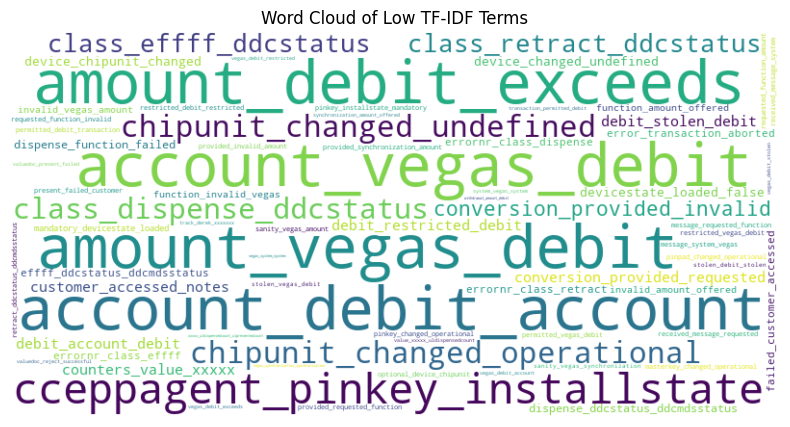

[5.715472286500726e-05, 3.287010544105102e-05, 3.1434959480133675e-05, 1.2228667158735045e-06, 3.1434959480133675e-05, 3.8129135008450665e-07, 1.789896815786355e-05, 3.1434959480133675e-05, 6.342787552392772e-05, 5.009255262624874e-05, 0.00015343127633731085, 7.310120940011728e-06, 3.8129135008450665e-07, 7.5383626902884e-05, 5.87106123865947e-05, 3.1434959480133675e-05, 5.87106123865947e-05, 2.7613950580330543e-05, 3.287010544105102e-05, 0.00016973930371497466, 3.194175511505479e-05, 3.7273145829305825e-05, 8.474034003358495e-05, 3.985324553700892e-05, 0.00038745327456432, 5.251304226155818e-05, 2.445733431747009e-06, 0.0012977650446038104, 5.00063074140797e-05, 1.2228667158735045e-06, 8.486965185748782e-06, 1.0394367084924788e-05, 8.486965185748782e-06, 4.984518001474348e-05, 6.904801201228612e-06, 1.077465093394131e-06, 7.75204221076332e-06, 3.0215769928984233e-05, 3.0215769928984233e-05, 3.0215769928984233e-05, 0.0011763977806703001, 3.050020118912234e-05, 3.1434959480133675e-05, 5

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract TF-IDF scores for each term
mean_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
terms = tfidf_vectorizer.get_feature_names_out()


# Define threshold for low TF-IDF scores
threshold = 0.000001  # Example threshold, adjust as needed
low_tfidf_terms = [terms[idx] for idx, score in enumerate(mean_tfidf_scores) if score < threshold]

# Step 3: Create a word cloud using the identified terms
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(term.replace(' ', '_') for term in low_tfidf_terms))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Low TF-IDF Terms')
plt.show()
print(mean_tfidf_scores)


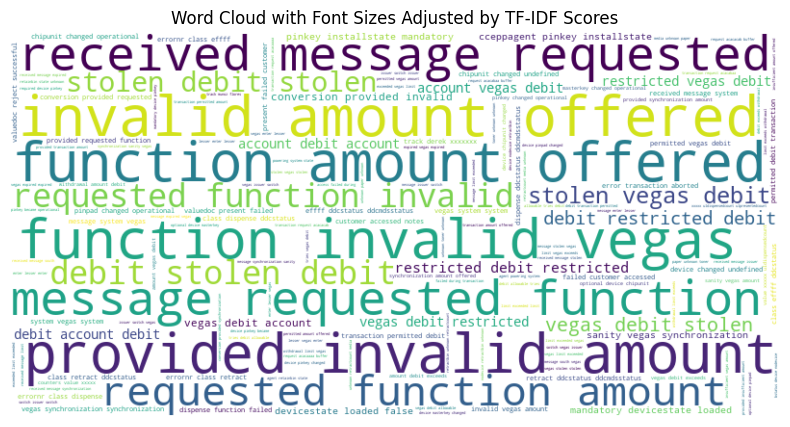

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract TF-IDF scores for each term
mean_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]
terms = tfidf_vectorizer.get_feature_names_out()

# Step 2: Inverse scaling of TF-IDF scores for font sizes
# Higher TF-IDF scores will have smaller font sizes
max_tfidf = max(mean_tfidf_scores)
scaled_tfidf_scores = {term: max_tfidf - score for term, score in zip(terms, mean_tfidf_scores)}

# Step 3: Create a word cloud using the TF-IDF scores as frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(scaled_tfidf_scores)

# Step 4: Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Font Sizes Adjusted by TF-IDF Scores')
plt.show()


In [9]:
# Step 4: Search for the exact lines in the journals where these terms occur
for term in low_tfidf_terms:
    print(f"Occurrences of '{term}':")
    for idx, entry in enumerate(processed_entries):
        if term in entry:
            print(f"Journal: {idx}, Line: {log_entries[idx]}")


Occurrences of 'agent available state':
Occurrences of 'agent cabinet_door closed':
Occurrences of 'agent cabinet_door opened':
Occurrences of 'agent money retract':
Occurrences of 'agent money_cassette_1 bin1':
Occurrences of 'agent money_cassette_2 bin2':
Occurrences of 'agent money_cassette_3 bin3':
Occurrences of 'agent money_cassette_4 bin4':
Occurrences of 'agent money_cassette_5 bin5':
Occurrences of 'agent receipt_printer paper':
Occurrences of 'agent receipt_printer retractbin':
Occurrences of 'agent receipt_printer state':
Occurrences of 'agent receipt_printer toner':
Occurrences of 'agent retain counter':
Occurrences of 'agent safe_door closed':
Occurrences of 'agent safe_door opened':
Occurrences of 'application application finished':
Occurrences of 'application application started':
Occurrences of 'application application state':
Occurrences of 'application closing customer':
Occurrences of 'application customer service':
Occurrences of 'application error management':
Occu